<a href="https://colab.research.google.com/github/guimaraess2/Natural_Processing_Language_NLP-/blob/main/PNL__Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas / Importing the libraries**

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_extraction.text import TfidfVectorizer 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Embedding
from google.colab import files
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib as plt

**Importando o dataset / Importing the dataset**

In [39]:
df = pd.read_csv("C:\Documentos\Mauro\Redes_Neurais\NLP\spam_ham_dataset.csv")

In [40]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


**Realizando a codificação categórica / Categorical encoding**

In [41]:
le = LabelEncoder()
rotulo = le.fit_transform(df['label'])



**Separando as classes de treino e teste / Train test split**

In [42]:
msg = df['text'].values 
X_train, X_test, y_train, y_test = train_test_split(msg, rotulo , test_size=0.3)


**Realização a tokenização das palavras / Words tokenization**

In [43]:
token = Tokenizer(num_words=1000) 
token.fit_on_texts(X_train) 


**Convertendo os tokens em sequencias numéricas / 
Converting tokens of text corpus into a sequence of integers.**

In [44]:
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

**Transformando os dados em um formato tabular / Transforming the data into a tabular format**

In [45]:
X_train = pad_sequences(X_train, padding="post", maxlen=500)
X_test = pad_sequences(X_test, padding="post", maxlen=500)



**Visualizando o tamanho do vocabulário / 
Viewing vocabulary size**

In [46]:
print(len(token.word_index))

47773


**Montando a topologia da rede neural e criando os embeddings / Neural Networks Topology**

In [47]:
model = Sequential() 
model.add(Embedding(input_dim=len(token.word_index), output_dim=50, input_length=500))
model.add(Flatten()) 
model.add(Dense(units = 10, activation="relu"))
model.add(Dropout(0.1)) 
model.add(Dense(units = 1, activation="sigmoid")) 

**Compilando o modelo / Compiling the model**

In [48]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 50)           2388650   
                                                                 
 flatten_1 (Flatten)         (None, 25000)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                250010    
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,638,671
Trainable params: 2,638,671
Non-trainable params: 0
_________________________________________________________________


**Treinamento da rede neural / 
Neural network training**

In [49]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 64, shuffle = True)

Epoch 1/20
57/57 [==============================] - 4s 59ms/step - loss: 0.1818 - accuracy: 0.7427 - val_loss: 0.1046 - val_accuracy: 0.9201
Epoch 2/20
57/57 [==============================] - 3s 55ms/step - loss: 0.0616 - accuracy: 0.9268 - val_loss: 0.0411 - val_accuracy: 0.9626
Epoch 3/20
57/57 [==============================] - 3s 48ms/step - loss: 0.0337 - accuracy: 0.9577 - val_loss: 0.0355 - val_accuracy: 0.9555
Epoch 4/20
57/57 [==============================] - 2s 42ms/step - loss: 0.0200 - accuracy: 0.9765 - val_loss: 0.0247 - val_accuracy: 0.9691
Epoch 5/20
57/57 [==============================] - 2s 42ms/step - loss: 0.0116 - accuracy: 0.9901 - val_loss: 0.0235 - val_accuracy: 0.9684
Epoch 6/20
57/57 [==============================] - 3s 45ms/step - loss: 0.0082 - accuracy: 0.9928 - val_loss: 0.0230 - val_accuracy: 0.9691
Epoch 7/20
57/57 [==============================] - 3s 51ms/step - loss: 0.0056 - accuracy: 0.9959 - val_loss: 0.0237 - val_accuracy: 0.9665
Epoch 8/20
57

**Verificando a acurácia do modelo / Checking model accuracy**

In [50]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss", loss)
#print("%.2f" % accuracy)    print('a is {:.2%} .'.format(a))
print("A acurácia do modelo é de {:.2%}.".format(accuracy))

49/49 [==============================] - 0s 4ms/step - loss: 0.0264 - accuracy: 0.9671
Loss 0.026410365477204323
A acurácia do modelo é de 96.71%.


**Realizando uma previsão de mensagem se é spam ou não spam / Performing a message prediction whether it is spam or not spam**

In [51]:
nova_previsão = model.predict(X_test)
prev = (nova_previsão > 0.5)
print(prev)

[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [ True]]


**Criando a matriz de confusão / Confusion Matriz**

[Text(0, 0.5, 'Verdadeiro'), Text(0, 1.5, 'Falso')]

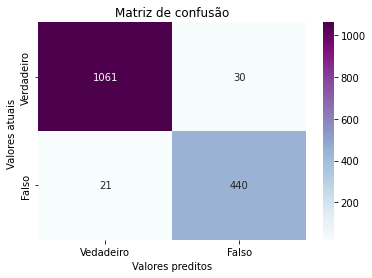

In [52]:
cm = confusion_matrix(y_test, prev)
ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
ax.set_title('Matriz de confusão');
ax.set_xlabel('Valores preditos')
ax.set_ylabel('Valores atuais ');
ax.xaxis.set_ticklabels(['Vedadeiro','Falso'])
ax.yaxis.set_ticklabels(['Verdadeiro','Falso'])
